# TME 8: Split
> Consignes: le fichier TME8_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME8_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !! 


In [1]:
from PIL import Image
from pylab import *

### Données
img_test = full((64,64),150,dtype=uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = array(Image.open('images/angiogra.png'))
cam = array(Image.open('images/cameraman.png'))
muscle = array(Image.open('images/muscle.png'))
prisme = array(Image.open('images/prisme.png'))
seiche = array(Image.open('images/seiche.png'))

### Fonction d'affichage
def affichage_14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
    Dffectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    Paramètres :
      - liste des affichages (entre 1 et 4)
      - liste des titres (entre 1 et 4, autant que de affichages), optionnelle    
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    show()



## Exercice 1

Question 1: 
Écrire la fonction récursive ``split()`` vue en TD. Elle prend en entrée l'image, une région, un prédicat, et un nombre variable d'arguments. La région est de type formel Python ```Bloc``` défini par :
```python
type Bloc = tuple[int**4]
```
La fonction ``split()`` retourne un arbre 4-aire de type formel Python, défini récursivement par:
```python
type 4-aire = list[(4-aire**4|Bloc)] 
```
Le prédicat est une fonction Python de signature:
```python
Array*Bloc*...->bool
```
Elle peut prendre un nombre variable de paramètres qui correspond aux paramètres du prédicat.


In [17]:
def split(I,reg,pred,*args):
    """ Array*Bloc*(Array*Bloc*...->bool)*... -> 4-aire
        Découpage de I en arbre 4-aire sur un critère d'écart-type minimal
    """
    x, y, n, m = reg
    if pred(I, reg, *args) and (n>2) and (m >2) :
        No= split (I, (x, y, n//2, m//2), pred, *args)
        Ne= split (I, (x, y+(m//2), n//2, m//2), pred, *args)
        So= split (I, (x+(n//2), y, n//2, m//2), pred, *args)
        Se= split (I, (x+(n//2), y+(m//2), n//2, m//2), pred, *args)
        
        return [No, Ne, So, Se]
    else :
        return [reg]
    


Question 2:
Écrire la fonction ```predsplit1(I,B,*args)``` de signature :
```python
Array*Bloc*... -> bool
```
qui retourne True si l'écart-type de l'image ``I`` calculé sur la région ``B`` est plus grand que la valeur du premier argument de ``*args`` (on y accède simplement par ``*args[0]``).

In [12]:
def predsplit1(I,reg,*args):
    """ Array*Bloc*... -> bool
    """ 
    x, y, n, m= reg
    
    return np.std(I[x:x+n, y:y+m])> args[0]
 

Question 3: Écrire la fonction ``splitprof(L)`` qui réaliste un parcours (récursif) en profondeur de l'arbre 4-aire passé en paramètre. La fonction retourne la liste des feuilles de ``L``, soit une liste de bloc.

In [13]:
def splitprof(L):
    """ 4-aire -> list[Bloc]"""
    if type(L) is tuple :
        return [L]
        #x, y, n, m = L[0]
        #print(L[x:x+n, y:y+m].mean())
        #print(L[x:x+n, y:y+m].std())
    else :
        tab=[]
        for l in L :
            tab+=splitprof(l)
        return tab


Question 4: Tester vos codes sur l'image test ``img_test`` vue en TD. Imprimer la valeur retournée par ``split()`` ainsi que celle retournée par ``profsplit()``. 

In [36]:


image1=split(img_test, (0, 0, 64, 64), predsplit1, 0)

print("image 1", image1)

image2 =splitprof(image1)

print("image 2", image2)

image 1 [[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]]
image 2 [(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]


Question 4: Écrire la fonction ```splitdraw(L,I)``` qui prend en paramètre une liste de bloc et une image et retourne une image dont les bords de chaque éléments de ``L`` ont été dessiné en rouge. Indication: l'image retournée est une hypermatrice de dimension 3, la troisième dimension a une taille de 3 et correspond aux composantes rouge, verte et bleue d'une image RGB. Tester son bon fonctionnement sur l'exemple précédent.


In [24]:
def splitdraw(L,I):
    """ list[Bloc]*Array -> Array
        parcours de la liste dessin des régions 
    """
    img=I.copy()
    for k in L :
        x, y, n, m = k
        for i in range (x, x+n):
            for j in range (y, y+n):
                if (i==x) or (i==x+n-1) or (j==y) or (j== y+m-1):
                    img[i, j]=255
    return img
    

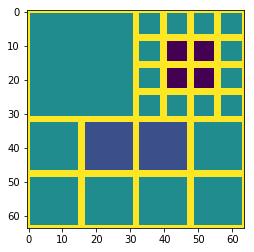

In [25]:
res = splitdraw(image2,img_test)
imshow(res)

Question 5: Ajouter un bruit gaussien sur l'image ``img_test`` d'écart-type 5. Recalculer un découpage 4-aire sur l'image bruitée en ajustant le seuil de façon à obtenir le même résultat que dans la question précédente. Quelle valeur de seuil a-t-il fallut choisir ? Cela vous semble-t-il cohérent ?

Indication: utiliser la fonction Numpy ``random.randn()`` qui génère des valeurs aléatoires tirées selon une loi normale (loi gaussienne de moyenne nulle et de variance 1). Pour obtenir des réalisations d'une gaussienne d'écart type $\sigma$, il suffit de faire des tirages d'une loi normale, multipliés par $\sigma$. 

In [34]:
from numpy import random

img3=img_test.copy()

dimx, dimy = img3.shape

for i in range (dimx-1):
    for j in range (dimy-1):
        img3[i, j]+= 5* np.random.randn()



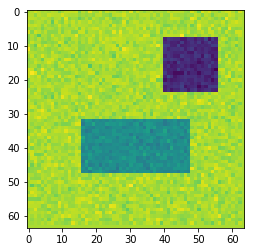

In [35]:

imshow(img3)

image 3 [[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]]
image 4 [(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]


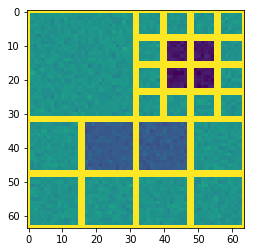

In [51]:
dimx, dimy= img3.shape

image3=split(img_test, (0, 0, dimx, dimy), predsplit1, 5)

print("image 3", image3)

image4 =splitprof(image3)

print("image 4", image4)

test = splitdraw (image4, img3)
                  
imshow(test)

# Exercice 2
Question 1:
Expérimenter l'algorithme de split sur les 4 images naturelles fournie. Pour chaque image essayer de trouver le seuil qui vous semble visuellement le meilleur. Afficher le nombre de bloc obtenus après découpage.

image 5 [[[(0, 0, 64, 64)], [[[[(0, 64, 8, 8)], [[[(0, 72, 2, 2)], [(0, 74, 2, 2)], [(2, 72, 2, 2)], [(2, 74, 2, 2)]], [[(0, 76, 2, 2)], [(0, 78, 2, 2)], [(2, 76, 2, 2)], [(2, 78, 2, 2)]], [[(4, 72, 2, 2)], [(4, 74, 2, 2)], [(6, 72, 2, 2)], [(6, 74, 2, 2)]], [[(4, 76, 2, 2)], [(4, 78, 2, 2)], [(6, 76, 2, 2)], [(6, 78, 2, 2)]]], [(8, 64, 8, 8)], [[[(8, 72, 2, 2)], [(8, 74, 2, 2)], [(10, 72, 2, 2)], [(10, 74, 2, 2)]], [[(8, 76, 2, 2)], [(8, 78, 2, 2)], [(10, 76, 2, 2)], [(10, 78, 2, 2)]], [[(12, 72, 2, 2)], [(12, 74, 2, 2)], [(14, 72, 2, 2)], [(14, 74, 2, 2)]], [[(12, 76, 2, 2)], [(12, 78, 2, 2)], [(14, 76, 2, 2)], [(14, 78, 2, 2)]]]], [[[(0, 80, 4, 4)], [(0, 84, 4, 4)], [(4, 80, 4, 4)], [(4, 84, 4, 4)]], [(0, 88, 8, 8)], [[[(8, 80, 2, 2)], [(8, 82, 2, 2)], [(10, 80, 2, 2)], [(10, 82, 2, 2)]], [[(8, 84, 2, 2)], [(8, 86, 2, 2)], [(10, 84, 2, 2)], [(10, 86, 2, 2)]], [(12, 80, 4, 4)], [[(12, 84, 2, 2)], [(12, 86, 2, 2)], [(14, 84, 2, 2)], [(14, 86, 2, 2)]]], [[(8, 88, 4, 4)], [(8, 92, 4, 4)

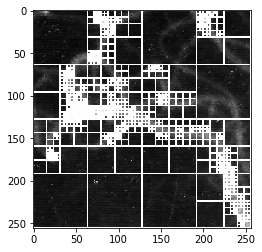

In [63]:
dimx, dimy= angio.shape

image5=split(angio, (0, 0, dimx, dimy), predsplit1, 20)

print("image 5", image5)

image6 =splitprof(image5)

print("image6", image6)

test1 = splitdraw (image6, angio)
                  
imshow(test1, cmap = 'gray')

image 5 [[[(0, 0, 64, 64)], [[(0, 64, 32, 32)], [(0, 96, 32, 32)], [(32, 64, 32, 32)], [[[(32, 96, 8, 8)], [[(32, 104, 4, 4)], [(32, 108, 4, 4)], [[(36, 104, 2, 2)], [(36, 106, 2, 2)], [(38, 104, 2, 2)], [(38, 106, 2, 2)]], [[(36, 108, 2, 2)], [(36, 110, 2, 2)], [(38, 108, 2, 2)], [(38, 110, 2, 2)]]], [[(40, 96, 4, 4)], [[(40, 100, 2, 2)], [(40, 102, 2, 2)], [(42, 100, 2, 2)], [(42, 102, 2, 2)]], [[(44, 96, 2, 2)], [(44, 98, 2, 2)], [(46, 96, 2, 2)], [(46, 98, 2, 2)]], [[(44, 100, 2, 2)], [(44, 102, 2, 2)], [(46, 100, 2, 2)], [(46, 102, 2, 2)]]], [(40, 104, 8, 8)]], [[[(32, 112, 4, 4)], [(32, 116, 4, 4)], [[(36, 112, 2, 2)], [(36, 114, 2, 2)], [(38, 112, 2, 2)], [(38, 114, 2, 2)]], [[(36, 116, 2, 2)], [(36, 118, 2, 2)], [(38, 116, 2, 2)], [(38, 118, 2, 2)]]], [[(32, 120, 4, 4)], [(32, 124, 4, 4)], [[(36, 120, 2, 2)], [(36, 122, 2, 2)], [(38, 120, 2, 2)], [(38, 122, 2, 2)]], [(36, 124, 4, 4)]], [(40, 112, 8, 8)], [[(40, 120, 4, 4)], [[(40, 124, 2, 2)], [(40, 126, 2, 2)], [(42, 124, 2, 2

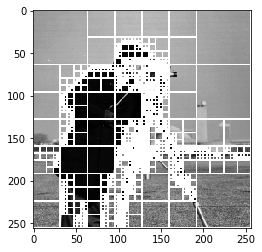

In [67]:
dimx, dimy= cam.shape

image5=split(cam, (0, 0, dimx, dimy), predsplit1, 30)

print("image 5", image5)

image6 =splitprof(image5)

print("image6", image6)

test1 = splitdraw (image6, cam)
                  
imshow(test1, cmap = 'gray')

image 5 [[[[(0, 0, 32, 32)], [[[[[(0, 32, 2, 2)], [(0, 34, 2, 2)], [(2, 32, 2, 2)], [(2, 34, 2, 2)]], [(0, 36, 4, 4)], [(4, 32, 4, 4)], [(4, 36, 4, 4)]], [[[(0, 40, 2, 2)], [(0, 42, 2, 2)], [(2, 40, 2, 2)], [(2, 42, 2, 2)]], [[(0, 44, 2, 2)], [(0, 46, 2, 2)], [(2, 44, 2, 2)], [(2, 46, 2, 2)]], [(4, 40, 4, 4)], [(4, 44, 4, 4)]], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [(0, 48, 16, 16)], [(16, 32, 16, 16)], [[(16, 48, 8, 8)], [[[(16, 56, 2, 2)], [(16, 58, 2, 2)], [(18, 56, 2, 2)], [(18, 58, 2, 2)]], [[(16, 60, 2, 2)], [(16, 62, 2, 2)], [(18, 60, 2, 2)], [(18, 62, 2, 2)]], [[(20, 56, 2, 2)], [(20, 58, 2, 2)], [(22, 56, 2, 2)], [(22, 58, 2, 2)]], [(20, 60, 4, 4)]], [(24, 48, 8, 8)], [[[(24, 56, 2, 2)], [(24, 58, 2, 2)], [(26, 56, 2, 2)], [(26, 58, 2, 2)]], [[(24, 60, 2, 2)], [(24, 62, 2, 2)], [(26, 60, 2, 2)], [(26, 62, 2, 2)]], [[(28, 56, 2, 2)], [(28, 58, 2, 2)], [(30, 56, 2, 2)], [(30, 58, 2, 2)]], [[(28, 60, 2, 2)], [(28, 62, 2, 2)], [(30, 60, 2, 2)], [(30, 62, 2, 2)]]]]], [[[(32, 0, 8, 8)]

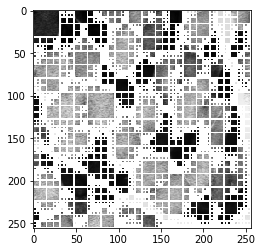

In [69]:
dimx, dimy= muscle.shape

image5=split(muscle, (0, 0, dimx, dimy), predsplit1, 20)

print("image 5", image5)

image6 =splitprof(image5)

print("image6", image6)

test1 = splitdraw (image6, muscle)
                  
imshow(test1, cmap = 'gray')

image 5 [[[[[(0, 0, 16, 16)], [[[[(0, 16, 2, 2)], [(0, 18, 2, 2)], [(2, 16, 2, 2)], [(2, 18, 2, 2)]], [(0, 20, 4, 4)], [[(4, 16, 2, 2)], [(4, 18, 2, 2)], [(6, 16, 2, 2)], [(6, 18, 2, 2)]], [[(4, 20, 2, 2)], [(4, 22, 2, 2)], [(6, 20, 2, 2)], [(6, 22, 2, 2)]]], [(0, 24, 8, 8)], [(8, 16, 8, 8)], [[[(8, 24, 2, 2)], [(8, 26, 2, 2)], [(10, 24, 2, 2)], [(10, 26, 2, 2)]], [(8, 28, 4, 4)], [(12, 24, 4, 4)], [(12, 28, 4, 4)]]], [(16, 0, 16, 16)], [(16, 16, 16, 16)]], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [[(8, 40, 4, 4)], [[(8, 44, 2, 2)], [(8, 46, 2, 2)], [(10, 44, 2, 2)], [(10, 46, 2, 2)]], [[(12, 40, 2, 2)], [(12, 42, 2, 2)], [(14, 40, 2, 2)], [(14, 42, 2, 2)]], [[(12, 44, 2, 2)], [(12, 46, 2, 2)], [(14, 44, 2, 2)], [(14, 46, 2, 2)]]]], [[[(0, 48, 4, 4)], [[(0, 52, 2, 2)], [(0, 54, 2, 2)], [(2, 52, 2, 2)], [(2, 54, 2, 2)]], [[(4, 48, 2, 2)], [(4, 50, 2, 2)], [(6, 48, 2, 2)], [(6, 50, 2, 2)]], [[(4, 52, 2, 2)], [(4, 54, 2, 2)], [(6, 52, 2, 2)], [(6, 54, 2, 2)]]], [[[(0, 56, 2, 2

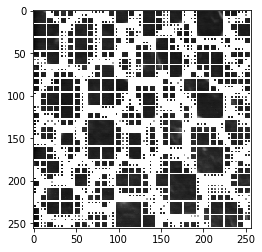

In [74]:
dimx, dimy= prisme.shape

image5=split(prisme, (0, 0, dimx, dimy), predsplit1, 15)

print("image 5", image5)

image6 =splitprof(image5)

print("image6", image6)

test1 = splitdraw (image6, prisme)
                  
imshow(test1, cmap = 'gray')

image 5 [[[[[(0, 0, 16, 16)], [(0, 16, 16, 16)], [(16, 0, 16, 16)], [[(16, 16, 8, 8)], [[(16, 24, 4, 4)], [[(16, 28, 2, 2)], [(16, 30, 2, 2)], [(18, 28, 2, 2)], [(18, 30, 2, 2)]], [(20, 24, 4, 4)], [[(20, 28, 2, 2)], [(20, 30, 2, 2)], [(22, 28, 2, 2)], [(22, 30, 2, 2)]]], [[(24, 16, 4, 4)], [(24, 20, 4, 4)], [(28, 16, 4, 4)], [(28, 20, 4, 4)]], [[[(24, 24, 2, 2)], [(24, 26, 2, 2)], [(26, 24, 2, 2)], [(26, 26, 2, 2)]], [(24, 28, 4, 4)], [[(28, 24, 2, 2)], [(28, 26, 2, 2)], [(30, 24, 2, 2)], [(30, 26, 2, 2)]], [(28, 28, 4, 4)]]]], [(0, 32, 32, 32)], [[[(32, 0, 8, 8)], [(32, 8, 8, 8)], [(40, 0, 8, 8)], [[(40, 8, 4, 4)], [[(40, 12, 2, 2)], [(40, 14, 2, 2)], [(42, 12, 2, 2)], [(42, 14, 2, 2)]], [(44, 8, 4, 4)], [[(44, 12, 2, 2)], [(44, 14, 2, 2)], [(46, 12, 2, 2)], [(46, 14, 2, 2)]]]], [[[[(32, 16, 2, 2)], [(32, 18, 2, 2)], [(34, 16, 2, 2)], [(34, 18, 2, 2)]], [[(32, 20, 2, 2)], [(32, 22, 2, 2)], [(34, 20, 2, 2)], [(34, 22, 2, 2)]], [[(36, 16, 2, 2)], [(36, 18, 2, 2)], [(38, 16, 2, 2)], [(3

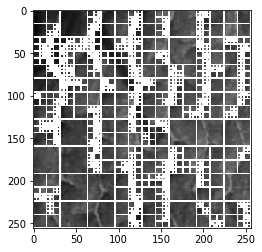

In [78]:
dimx, dimy= seiche.shape

image5=split(seiche, (0, 0, dimx, dimy), predsplit1, 15)

print("image 5", image5)

image6 =splitprof(image5)

print("image6", image6)

test1 = splitdraw (image6, seiche)
                  
imshow(test1, cmap = 'gray')

Question 2 (bonus): proposer un critère de découpage alternatif. Par exemple, un critère basé sur des contours ou un autre. Le critère peut être adapté à chaque type d'image.
